# Lab 1: Basic Measurements and Oscilloscope Use

In [219]:
import numpy as np
import matplotlib.pyplot as plt

#### 4. Function generator output impedance

$$V_\text{out}=V\frac{R_\text{Load}}{R_\text{out}+R_\text{Load}}$$

Plot $\frac{1}{R_\text{Load}}$ vs. $\frac{1}{V_\text{out}}$

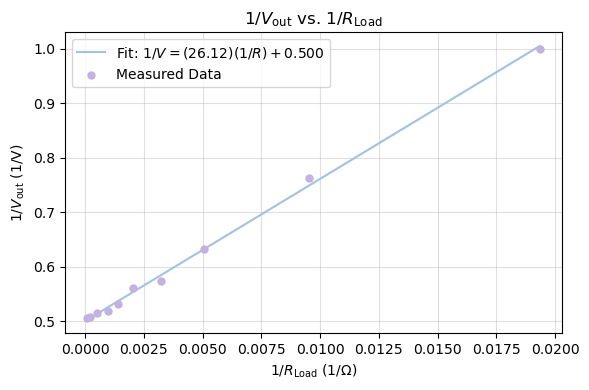

In [220]:
# fake data
R_load = np.array([48.93, 97.85, 219.42, 327.10, 468.55, 682.77, 1008.40, 2215.63, 4732.18, 9945.71])
V_out = np.array([1.02, 1.34, 1.62, 1.73, 1.81, 1.87, 1.91, 1.96, 1.98, 1.99])

# -> use this fake data
R_load = np.array([51.7, 104.9, 197.1, 309.8, 489.2, 703.5, 1009.6, 1995.3, 4952.8, 10021.4])
V_out = np.array([1.00, 1.31, 1.58, 1.74, 1.78, 1.88, 1.93, 1.94, 1.97, 1.98])


# linearized form
inv_R = 1 / R_load
inv_V = 1 / V_out

# fit 1/V_out = m * (1/R_out) + B
coeffs = np.polyfit(inv_R, inv_V, 1)
m, b = coeffs
fit_line = np.poly1d(coeffs)(inv_R)

# extract R_out and V from slope/intercept
V = 1 / b
R_out = m / b

fit_eq = fr"$1/V = ({m:.2f})(1/R) + {b:.3f}$"

plt.figure(figsize=(6, 4))
plt.plot(inv_R, fit_line, color='#A2C2E0', label=f'Fit: {fit_eq}', lw=1.5)
plt.scatter(inv_R, inv_V, color='#C3B1E1', label='Measured Data', s=25, zorder=2)
plt.xlabel(r'$1/R_\mathrm{Load}$ (1/Ω)')
plt.ylabel(r'$1/V_\mathrm{out}$ (1/V)')
plt.title(r"$1/V_\mathrm{out}$ vs. $1/R_\mathrm{Load}$")
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig('1.4.d.png')
plt.show()

In [221]:
print(coeffs)
print(f'V = {1/coeffs[1]:.3f}')
print(f'R_out = {coeffs[0]/coeffs[1]:.3f}')

[26.12031661  0.50025253]
V = 1.999
R_out = 52.214


From the linearized form, we can extract

$$m = \frac{R_\text{out}}{V}$$

$$b = \frac{1}{V}$$

which gives us

$$V = \frac{1}{b}$$

$$R_\text{out}=\frac{m}{b}$$

/var/folders/r2/_n_91pks3n9f792s90nk2p740000gn/T/ipykernel_38242/3865436102.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


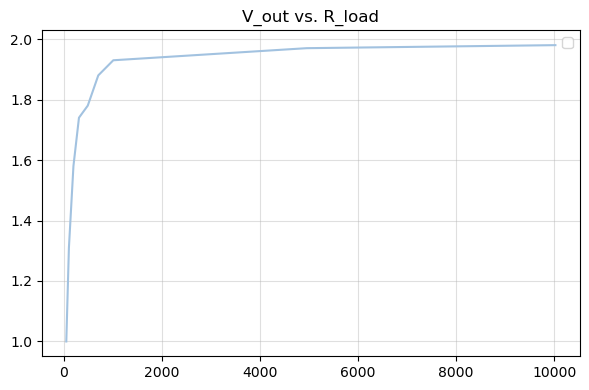

In [222]:
# just testing this out

plt.figure(figsize=(6, 4))
plt.plot(R_load, V_out, color='#A2C2E0')
# plt.scatter(inv_R, inv_V, color='#C3B1E1', label='Measured Data', s=25, zorder=2)
plt.grid(alpha=0.4)
plt.legend()
plt.title('V_out vs. R_load')
plt.tight_layout()
plt.show()